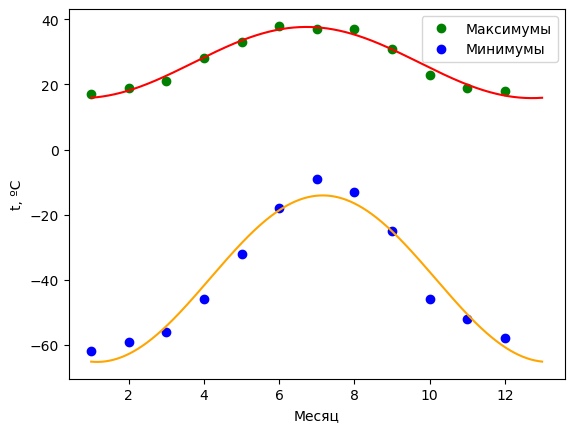

In [6]:
#task 1
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

def f(x, a, b, c):
    return a*np.sin((x+b)*np.pi/6) + c

max_t = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9,	-13, -25, -46, -52, -58])
x = np.arange(1,13)
plt.plot(x, max_t, 'go', label='Максимумы')
plt.plot(x, min_t, 'bo', label='Минимумы')
pars1 = sp.optimize.curve_fit(f, x, max_t)
pars2 = sp.optimize.curve_fit(f, x, min_t)

x1 = np.arange(1,13,0.01)
plt.plot(x1, f(x1, pars1[0][0], pars1[0][1], pars1[0][2]), 'r')
plt.plot(x1, f(x1, pars2[0][0], pars2[0][1], pars2[0][2]), 'orange')
plt.xlabel('Месяц')
plt.ylabel('t, ºC')
plt.legend()
plt.show()

global_min = -1.0316284534898768
local_min = -0.21546382438371625


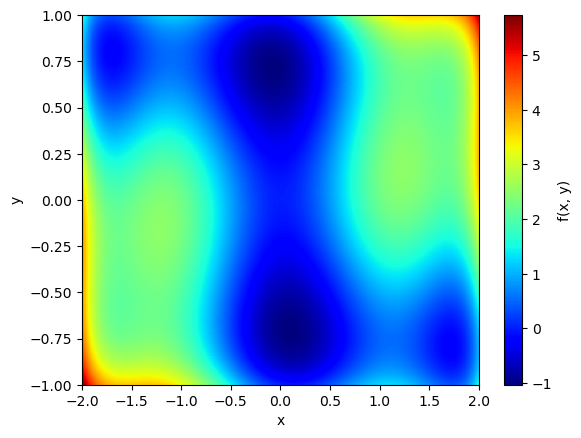

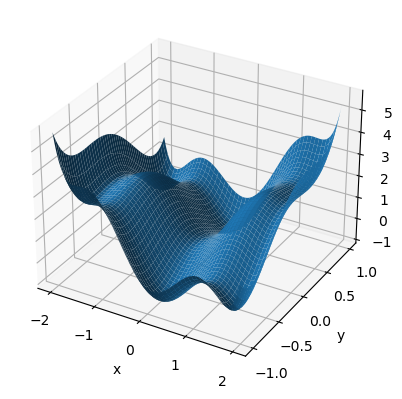

In [7]:
#task 2
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

def f(xy):
    return (4 - 2.1*xy[0]**2 + xy[0]**4 / 3)*xy[0]**2 + xy[0]*xy[1] + (4*xy[1]**2 - 4)*xy[1]**2


#Нахождение глобального минимума
global_min = sp.optimize.differential_evolution(f, bounds=[(-2,2), (-1,1)]).x
print('global_min =', f(global_min))

#Нахождение локального минимума
local_min = sp.optimize.differential_evolution(f, bounds=[(-2,-1), (-1,1)]).x
print('local_min =', f(local_min))

x = np.arange(-2,2,0.02)
y = np.arange(-1,1,0.01)
xy = np.meshgrid(x,y)
z = f(xy)

#2D график
plt.imshow(z, extent=(-2, 2, -1, 1), origin='lower', cmap='jet', aspect='auto')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')

#3D график
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(xy[0], xy[1], z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [13]:
#task 3
import numpy as np

def find_max_sum_segment(array, k):
    array = np.array(array)
    n = np.size(array)
    if k > n:
        return 'There is no segment of this length'
    a = np.zeros((n,n-k+1), dtype = int)
    x = np.ravel(np.zeros((n-k+1,k), dtype = int) + np.transpose(np.array([np.arange(n-k+1)])))
    y = np.ravel(np.transpose(np.array([np.arange(n-k+1)])) + np.array([np.arange(k)]))
    a[y, x] = 1
    return np.max(array@a)
find_max_sum_segment(list(map(int, input().split())), int(input()))

 5 3 -6 1
 2


8

In [9]:
#task 4
import numpy as np

def find_nearest_points(A, B, k):
    n = np.size(A, axis=0)
    m = np.size(B, axis=0)
    d = np.size(A, axis=1)
    C = [0]*m
    for i in range(m):
        Bi = np.array([B[i]]*n)
        M1 = (A-Bi)**2
        M2 = np.ones((d,1), dtype=int)
        M3 = np.ravel(M1@M2)
        if k == n:
            M4 = np.concatenate((np.argpartition(M3, k-1), [np.argmax(M3)]))[:k]+1
        else:
            M4 = np.argpartition(M3, k)[:k]+1
        C[i] = M4
    return np.array(C)


In [10]:
#task 5
import numpy as np

def matrix_multiplication(A,B):
    n = np.size(A, axis=0)
    k1 = np.size(A, axis=1)
    k2 = np.size(B, axis=0)
    m = np.size(B, axis=1)
    if k1 != k2:
        return 'multiplication impossible'
    k = k1
    M1 = np.array([A]*m)
    M2 = np.repeat(np.transpose(B), n, axis=0).reshape(m, n, k)
    return np.transpose(np.sum(M1*M2, axis=-1))
    

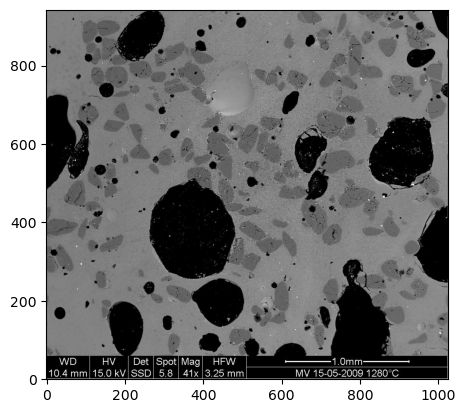

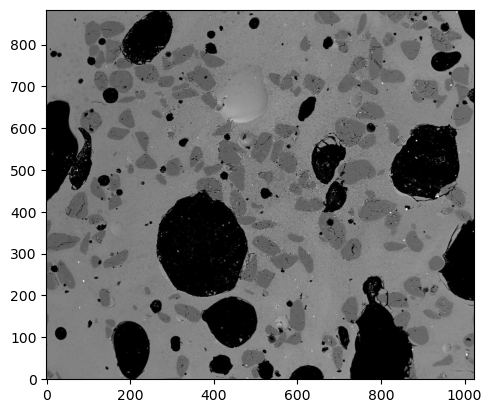

In [11]:
#task 6
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

data = plt.imread('MV_HFV_012.jpg')
plt.imshow(data, cmap='gray', extent=(-0.5, data.shape[1]-0.5, -0.5, data.shape[0]-0.5))
plt.show()

#Обрезка изображения
data0 = data[:884]
plt.imshow(data0, cmap='gray', extent=(-0.5, data0.shape[1]-0.5, -0.5, data0.shape[0]-0.5))


plt.show()
